In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [100]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

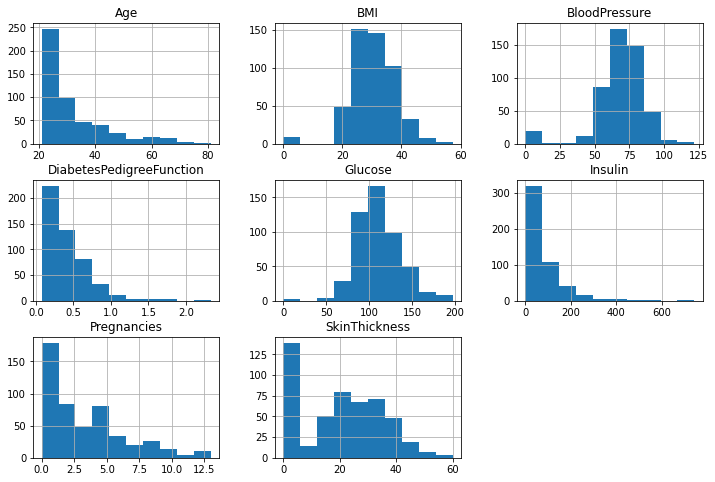

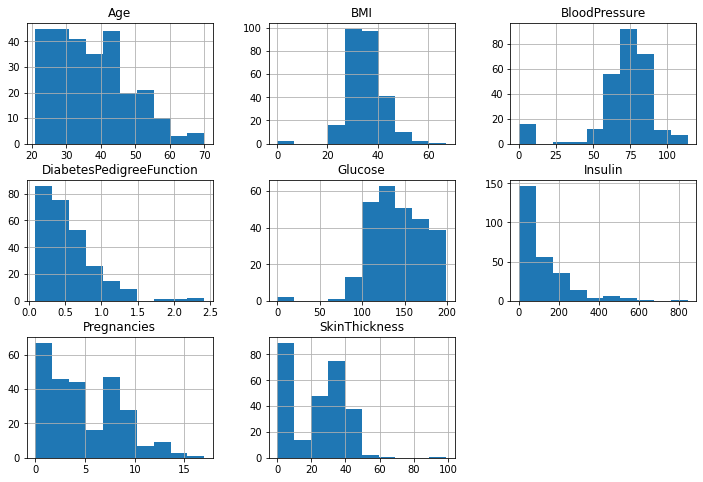

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

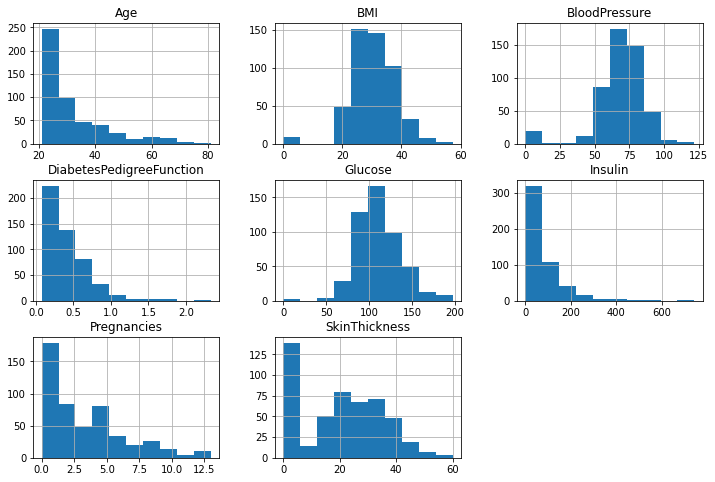

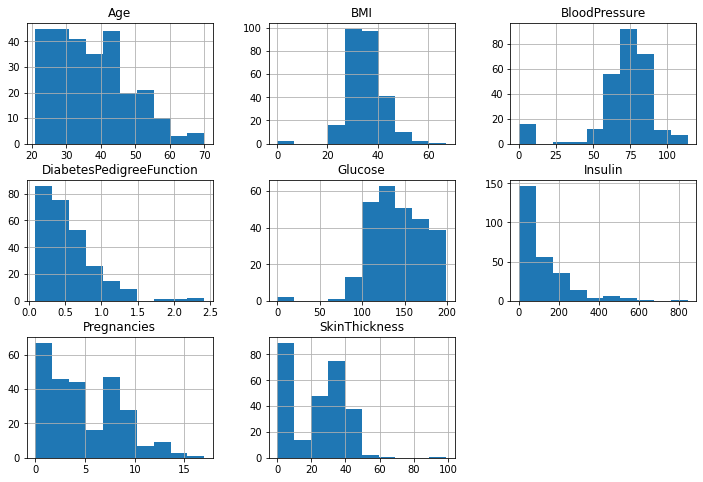

In [101]:
df.groupby('Outcome').hist(figsize = (12,8))

In [102]:
#Data cleaning
df.rename(columns={'BloodPressure': 'Blood_Pressure', 'SkinThickness': 'Skin_Thickness'}, inplace=True)
df.drop(["Insulin"],axis=1, inplace=True) #Not enough data to be beneficial
df.drop(["Age"],axis=1, inplace=True) #Average age of participants between 20 and 40, data was skewed
df = df[(df[['Blood_Pressure','Skin_Thickness','BMI',"Glucose"]] != 0).all(axis=1)] #Drops data points that were 0, meaning there was no data given
df

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,33.6,0.627,1
1,1,85,66,29,26.6,0.351,0
3,1,89,66,23,28.1,0.167,0
4,0,137,40,35,43.1,2.288,1
6,3,78,50,32,31.0,0.248,1
...,...,...,...,...,...,...,...
761,9,170,74,31,44.0,0.403,1
763,10,101,76,48,32.9,0.171,0
764,2,122,70,27,36.8,0.340,0
765,5,121,72,23,26.2,0.245,0


,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,33.6,0.627,1
1,1,85,66,29,26.6,0.351,0
3,1,89,66,23,28.1,0.167,0
4,0,137,40,35,43.1,2.288,1
6,3,78,50,32,31.0,0.248,1
...,...,...,...,...,...,...,...
761,9,170,74,31,44.0,0.403,1
763,10,101,76,48,32.9,0.171,0
764,2,122,70,27,36.8,0.340,0
765,5,121,72,23,26.2,0.245,0


In [103]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      Pregnancies  Glucose  ...  DiabetesPedigreeFunction  Outcome
0              6      148  ...                     0.627        1
1              1       85  ...                     0.351        0
3              1       89  ...                     0.167        0
4              0      137  ...                     2.288        1
6              3       78  ...                     0.248        1
..           ...      ...  ...                       ...      ...
761            9      170  ...                     0.403        1
763           10      101  ...                     0.171        0
764            2      122  ...                     0.340        0
765            5      121  ...                     0.245        0
767            1       93  ...                     0.315        0

[532 rows x 7 columns]>

<bound method DataFrame.drop_duplicates of      Pregnancies  Glucose  ...  DiabetesPedigreeFunction  Outcome
0              6      148  ...                     0.627        1
1              1       85  ...                     0.351        0
3              1       89  ...                     0.167        0
4              0      137  ...                     2.288        1
6              3       78  ...                     0.248        1
..           ...      ...  ...                       ...      ...
761            9      170  ...                     0.403        1
763           10      101  ...                     0.171        0
764            2      122  ...                     0.340        0
765            5      121  ...                     0.245        0
767            1       93  ...                     0.315        0

[532 rows x 7 columns]>

In [104]:
df

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,33.6,0.627,1
1,1,85,66,29,26.6,0.351,0
3,1,89,66,23,28.1,0.167,0
4,0,137,40,35,43.1,2.288,1
6,3,78,50,32,31.0,0.248,1
...,...,...,...,...,...,...,...
761,9,170,74,31,44.0,0.403,1
763,10,101,76,48,32.9,0.171,0
764,2,122,70,27,36.8,0.340,0
765,5,121,72,23,26.2,0.245,0


,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,33.6,0.627,1
1,1,85,66,29,26.6,0.351,0
3,1,89,66,23,28.1,0.167,0
4,0,137,40,35,43.1,2.288,1
6,3,78,50,32,31.0,0.248,1
...,...,...,...,...,...,...,...
761,9,170,74,31,44.0,0.403,1
763,10,101,76,48,32.9,0.171,0
764,2,122,70,27,36.8,0.340,0
765,5,121,72,23,26.2,0.245,0


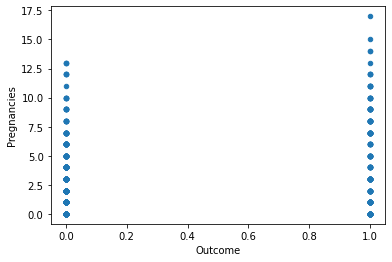

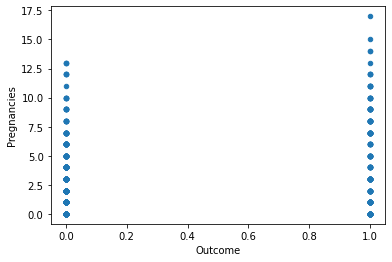

In [105]:
df.plot.scatter(x='Outcome',y='Pregnancies')

Outcome
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

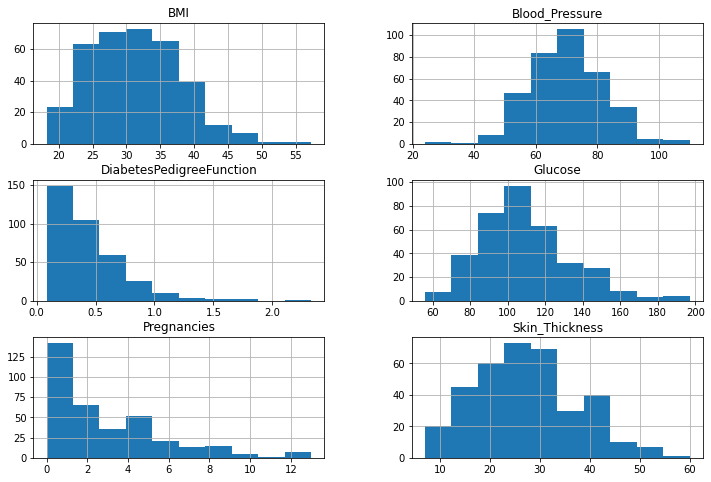

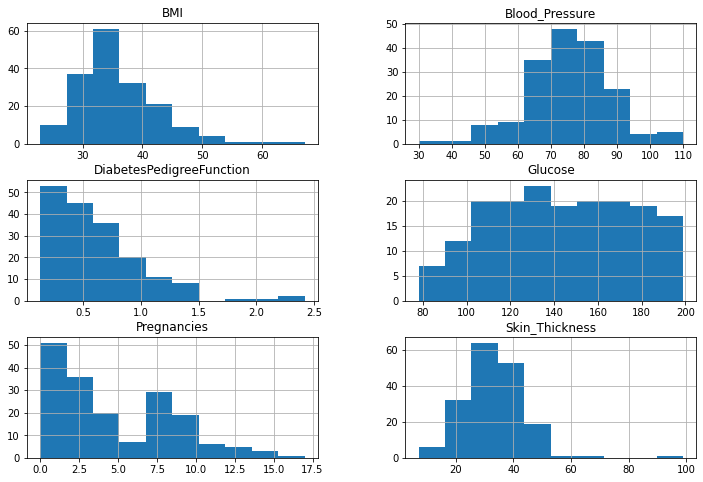

Outcome
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

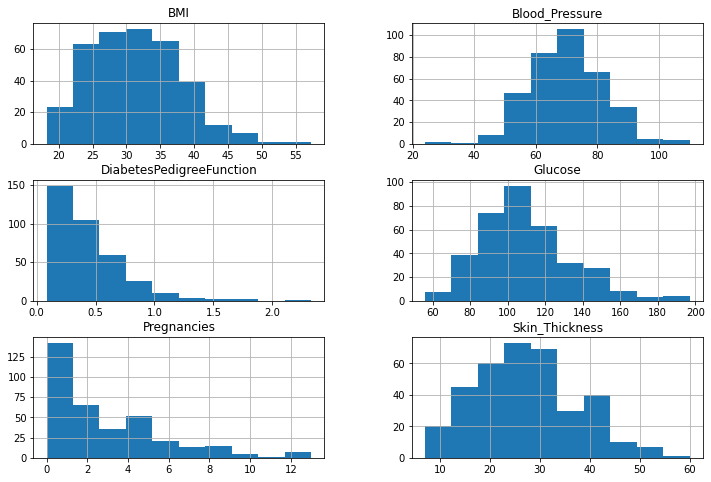

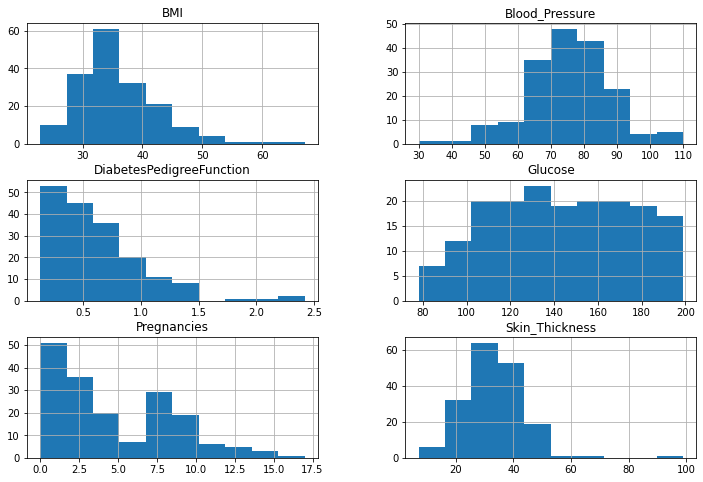

In [106]:
df.groupby('Outcome').hist(figsize = (12,8))

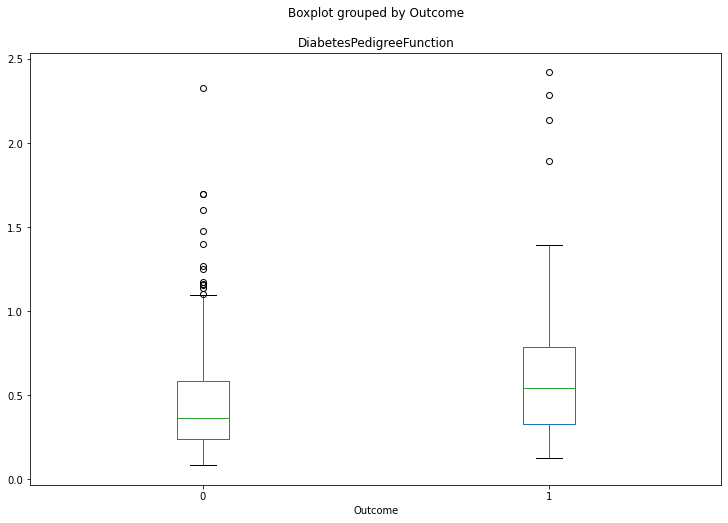

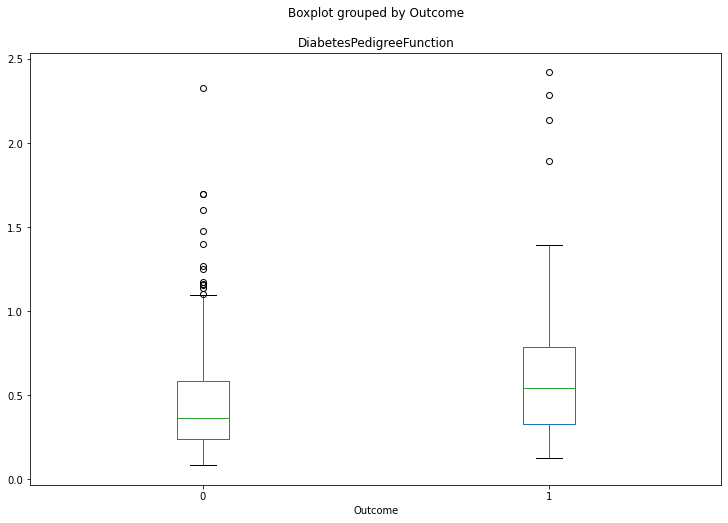

In [107]:
df.boxplot('DiabetesPedigreeFunction', by = 'Outcome', figsize = (12,8), grid = False)

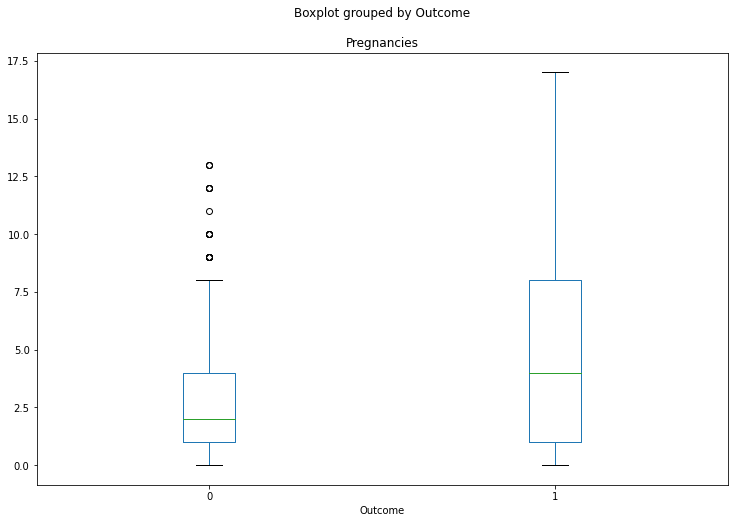

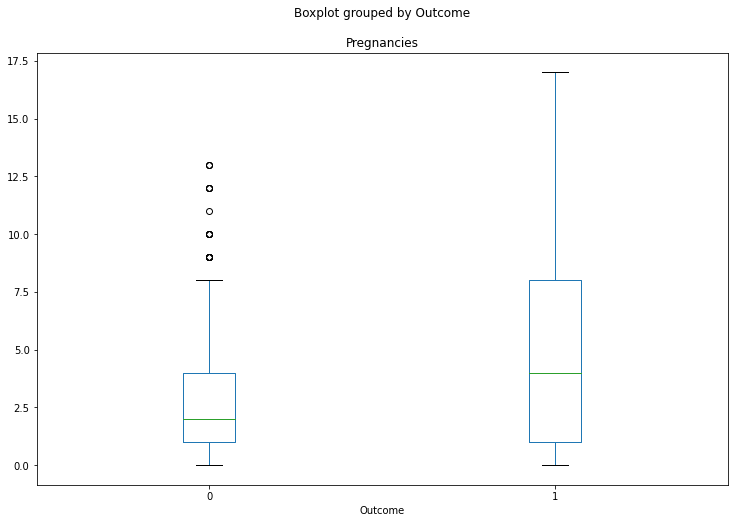

In [108]:
df.boxplot('Pregnancies', by = 'Outcome', figsize = (12,8), grid = False)

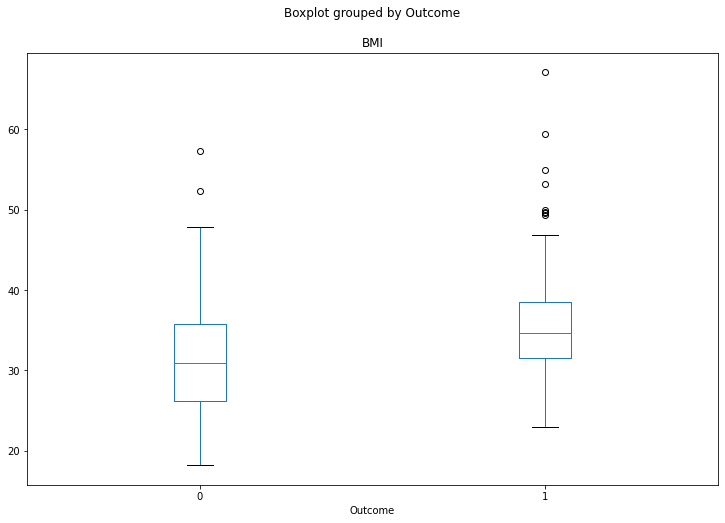

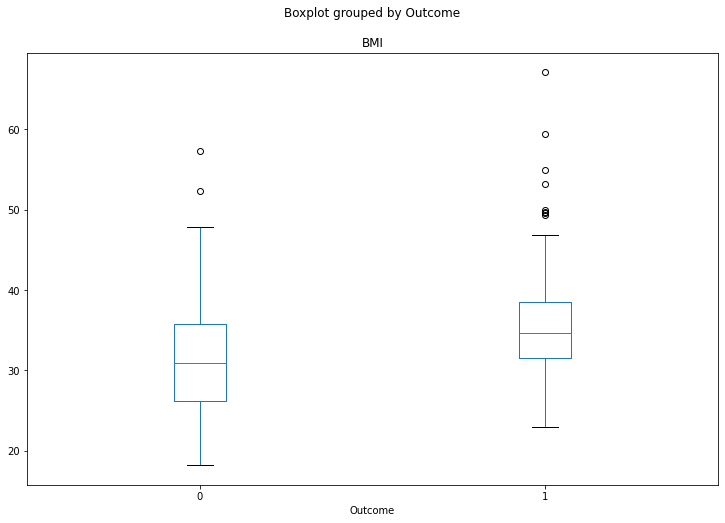

In [109]:
df.boxplot('BMI', by = 'Outcome', figsize = (12,8), grid = False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e4f4eb160>,
      dtype=object)

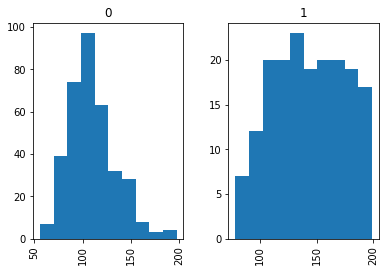

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e4d6bfba8>,
      dtype=object)

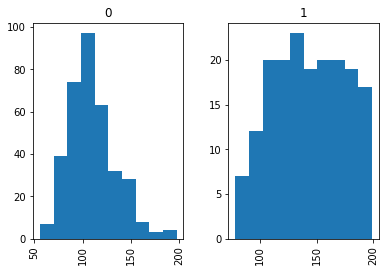

In [110]:
df.hist('Glucose', 'Outcome')

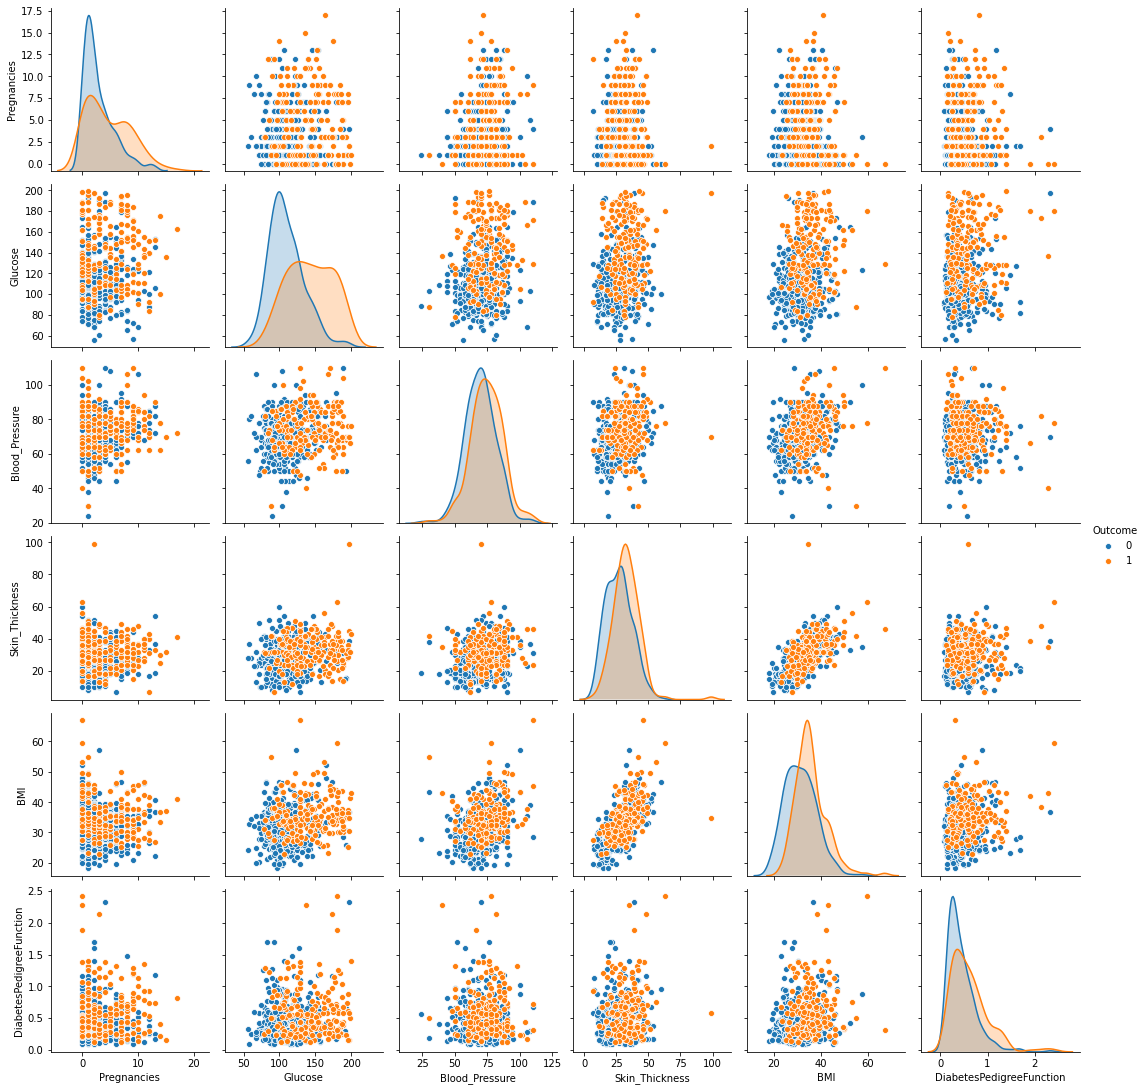

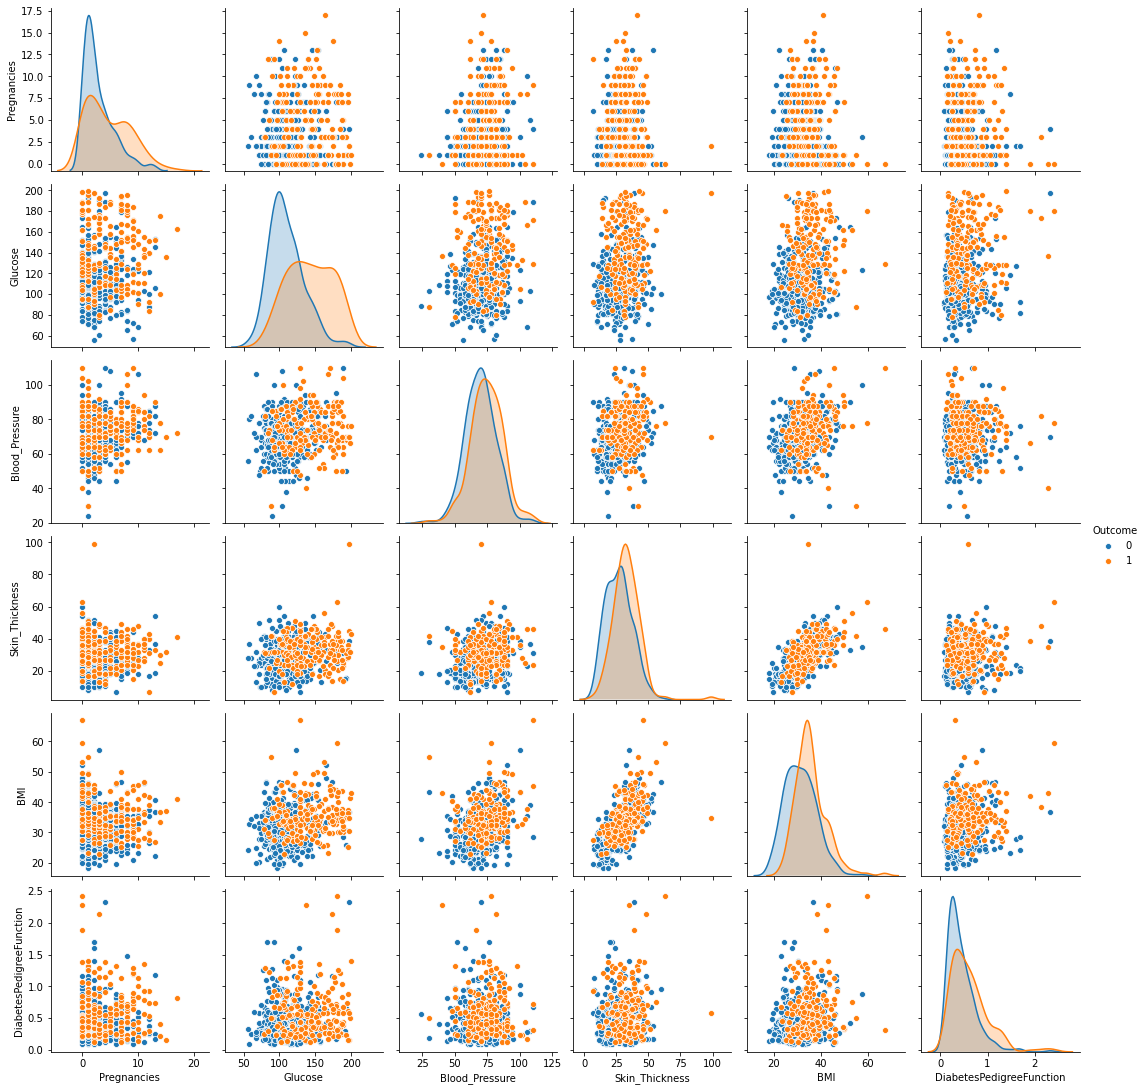

In [111]:
sns.pairplot(df,hue='Outcome')

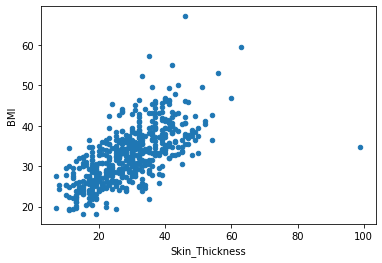

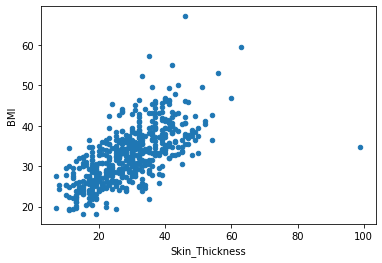

In [112]:
df.plot.scatter(x="Skin_Thickness",y="BMI")

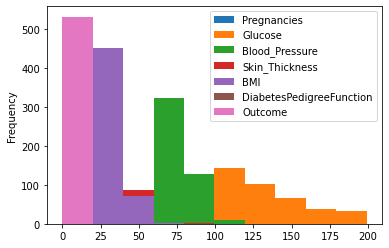

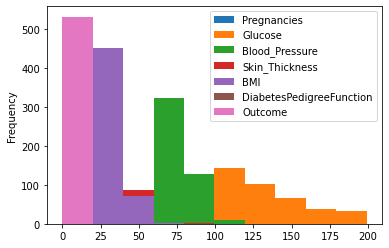

In [113]:
df.plot.hist(by="Pregnancies")

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [0]:
feature_names = ['Glucose', 'Pregnancies', 'DiabetesPedigreeFunction', 'Skin_Thickness', 'Blood_Pressure', 'BMI']

In [0]:
x = df[feature_names]
y = df.Outcome

In [117]:
log_reg_1 = LogisticRegression()
log_reg_1.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 0)

In [120]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(372, 6)
(160, 6)
(372,)
(160,)
(372, 6)
(160, 6)
(372,)
(160,)


In [121]:
log_reg_1.fit(x,y.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [123]:
df.Outcome.unique()

array([1, 0])

array([1, 0])

In [124]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_5.fit(x,y.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
neighbors = list(range(1,51))
score = []

In [0]:
for i in neighbors:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train, y_train.values.ravel())
    preds_neighbors = clf.predict(x_test)
    score.append(accuracy_score(y_true = y_test, y_pred = preds_neighbors))

In [127]:
score

[0.7,
 0.7125,
 0.73125,
 0.74375,
 0.7625,
 0.74375,
 0.7625,
 0.75,
 0.7375,
 0.725,
 0.725,
 0.725,
 0.74375,
 0.75625,
 0.75625,
 0.75,
 0.74375,
 0.74375,
 0.75,
 0.74375,
 0.7375,
 0.74375,
 0.7375,
 0.75,
 0.75,
 0.74375,
 0.74375,
 0.74375,
 0.74375,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75625,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75625,
 0.75,
 0.75,
 0.75,
 0.75625,
 0.7625,
 0.7625,
 0.75625,
 0.75625,
 0.75625,
 0.75,
 0.75625]

[0.7,
 0.7125,
 0.73125,
 0.74375,
 0.7625,
 0.74375,
 0.7625,
 0.75,
 0.7375,
 0.725,
 0.725,
 0.725,
 0.74375,
 0.75625,
 0.75625,
 0.75,
 0.74375,
 0.74375,
 0.75,
 0.74375,
 0.7375,
 0.74375,
 0.7375,
 0.75,
 0.75,
 0.74375,
 0.74375,
 0.74375,
 0.74375,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75625,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75625,
 0.75,
 0.75,
 0.75,
 0.75625,
 0.7625,
 0.7625,
 0.75625,
 0.75625,
 0.75625,
 0.75,
 0.75625]

Text(0, 0.5, 'Testing Accuracy')

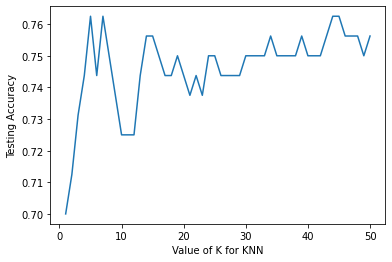

Text(0, 0.5, 'Testing Accuracy')

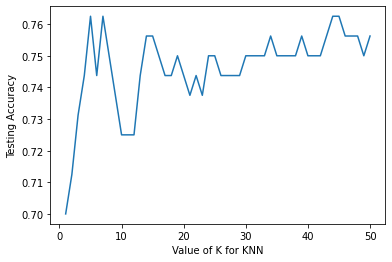

In [128]:
plt.plot(neighbors, score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [0]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))

In [130]:
names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
train_split = pd.DataFrame({'Name': names, 'Score': scores})
print(train_split)

  Name   Score
0  KNN  0.7625
1   LR  0.7875
2   DT  0.6750
  Name    Score
0  KNN  0.76250
1   LR  0.78750
2   DT  0.66875


In [0]:
from sklearn.model_selection import KFold

In [0]:
X = df[feature_names]

In [133]:
names = []
scores = []
for name, model in models: 
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
kfold_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kfold_cross_val)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

  Name     Score
0  KNN  0.734871
1   LR  0.772432
2   DT  0.716212


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You sho

  Name     Score
0  KNN  0.734871
1   LR  0.772432
2   DT  0.712334


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
log_preds = log_reg_1.predict(x_test)
knn_preds = knn_5.predict(x_test)

In [135]:
accuracy_score(y_true = y_test, y_pred = knn_preds)

0.85

In [136]:
accuracy_score(y_true = y_test, y_pred = log_preds)

0.78125

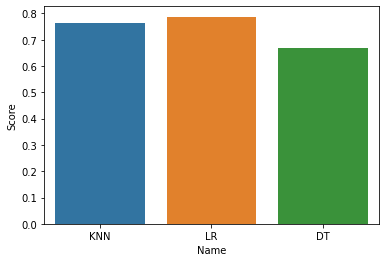

In [137]:
axis = sns.barplot(x = 'Name', y = 'Score', data = train_split)
plt.show()

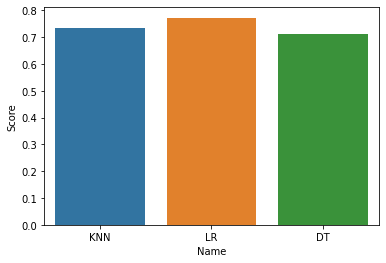

In [138]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kfold_cross_val)
plt.show()

In [0]:
from sklearn import metrics
feature_cols = ['Pregnancies', 'BMI','Glucose','Blood_Pressure','DiabetesPedigreeFunction']
X = df[feature_cols]
y = df.Outcome

In [0]:
import numpy as np
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [141]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[84, 21],
       [32, 23]])

Text(0.5, 257.44, 'Predicted Outcome')

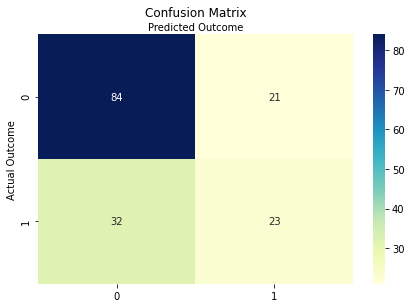

In [142]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')

In [143]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.66875
Precision: 0.5227272727272727
Recall: 0.41818181818181815


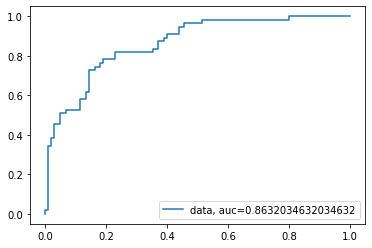

In [144]:
y_pred_prob = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()